## <center>  MATH11146: Modern Optimization Methods for Big Data Problems </center>

<center> University of Edinburgh</center>

<center>Lecturer: Peter Richtarik</center>

<center>Tutors: Filip Hanzely, Nicolas Loizou and Sona Galovicova</center>

##  <center>Lab 1 (with solutions): Introduction to Julia</center>
<center>(C) Sona Galovicova and Peter Richtarik </center>
<center> 16.1.2017 </center>

### <font color='blue'>Scroll down to find the sample solutions.</font>


## 1. About Julia

All the labs will be in the Julia language. Julia is a young and developing language, first appearing in 2012. Think of Julia as a language which is nearly as fast as C, while being as easy to work with as MATLAB. Many important people think Julia will become the main language for scientific computing in the next decade or so. Presumably most of you have not worked with Julia before - do not worry about it, you will pick it up during the course. 

Julia documentation: http://docs.julialang.org/

## 2. Generating random numbers

### Uniform distribution

As a start, we will learn how to generate random vectors and matrices. Run the cell below to generate a 10-dimensional vector, with values drawn from the uniform distribution on [0,1].

In [ ]:
v = rand(10)

You can see the vector $v$ above. When you run a cell, the output of the last command is printed. If you don't want this to happen, you can suppress the output by ending the line with a semicolon ';'.

In [ ]:
w = rand(5);

You can always print your data later using the *print()* or *println()* methods.

In [ ]:
println(w)

Generating random  $m \times n$ matrices works the same way:

In [ ]:
m = 3
n = 5
A = rand(m,n)

... and so does generating arrays of higher dimensions.

In [ ]:
T = rand(2,2,3)

### Other distributions

Julia has also ways to generate values from other distributions, for example

- *normal distribution* with mean 0 and standard deviation 1:

In [ ]:
G = randn(3,4)

- *exponential distribution* with scale 1:

In [ ]:
X = randexp(3,4)

- for more, look at the documentation for the **Distributions** package: 
http://distributionsjl.readthedocs.io/en/latest/starting.html

### Setting random seed

You might have noticed that every time you run the cells above, a different set of values is generated. This makes sense, as the values are supposed to be random. However, sometimes you might want to repeat your experiments with the same set of random values. To achieve this, you can set the *random seed*.

Run the next cell multiple times to convince yourself that you will always get the same values. You can also try changing the value sent to the *srand()* method and see what happens.

In [ ]:
srand(2) # Setting the seed 

z = rand(10)

## 3. Working with arrays

There are quick ways to create some standard matrices. 

(To run the next cell you need the variables $m$ and $n$ - in case you restarted the notebook kernel since you ran the cell defining them in the previous section, run it again now.)

In [ ]:
# m by n identity matrix
I = eye(m,n)

In [ ]:
# m by 1 matrix of zeros
Z = zeros(m)

In [ ]:
# n by m matrix of ones
O = ones(n,m)

If you want to create a $3 \times 5$ matrix filled with the sequence [1,2,3,...,15]:

In [ ]:
S = reshape(1:15, m, n)

*Note:* the sequence is sorted column by column in the matrix.

### Matrix operations

**Adding** or **multiplying matrices** is easy, just make sure they have the right dimensions:

In [ ]:
B = A + eye(m,n)

In [ ]:
C = A * rand(n,1) # C is m by 1

**Pointwise operations** use '.' before the operator:

In [ ]:
D = A .* eye(m,n)

You can also do **pointwise comparisons**. See the example below to quickly calculate how many values in a matrix are positive.

In [ ]:
F = randn(m,n)
println("F = ", F, ", number of positive values = ", sum(F .> 0))

You can also **concatenate matrices**:

In [ ]:
G = [A I] # horizontally

In [ ]:
H = [A; I] # vertically

### Indexing

Arrays are **indexed from 1** (so be careful if you are used to other languages, e.g. Python!)

In [ ]:
println(S)
println(S[1,3])

You can access whole rows or columns at once:

In [ ]:
S[:,1] # first column

In [ ]:
S[3,:] # third row

And even better, you can index vectors by arrays of booleans! For example, using the pointwise comparisons from above, if you want to take all the even numbers from a vector and multiply them by 2 (why wouldn't you want to do it?), just do this:

In [ ]:
R = collect(1:m*n) # this creates a vector [1,2,...,m*n]
R[(R%2) .== 0] *= 2 # multiplies each element divisible by 2
println(R)

### Other useful things to know:

In [ ]:
AT = A' # transpose of a matrix

In [ ]:
println("Number of dimensions of A: ", ndims(A))
println("Total length of A: ", length(A))
println("Dimensions of A: ", size(A))
println("Second dimension of A: ", size(A,2))

The following function returns **eigenvalues and eigenvectors** of the given matrix. 

We send it $A^T A$ which is symmetric and positive semi-definite.

In [1]:
AtA = A' * A
eig(AtA) # returns an array of eigenvalues, and a matrix with the corresponding eigenvectors

LoadError: UndefVarError: A not defined

*Remark:* As $A$ is $3 \times 5$, its rank is at most $3$, and so also $A^T A$ is at most of rank $3$. This implies that at least 2 of the eigenvalues have to be $0$. The values returned are not exactly 0 but rather of order $10^{-16}$ because of machine precision.

## 4. Loops, conditions and custom functions

The code snippets below should give you an idea how **for loops**, **if statements** and **custom functions** are written in Julia.

In [ ]:
for i=1:5
    println(i)
end

In [ ]:
if (14%2 == 0) 
    println("14 is even")
else
    println("14 is odd")
end

In [ ]:
function Hello(name)
    println("Hello, ", name, "!")
end

Hello("World")

In [ ]:
function FindDivisors(N)
    for d=1:N
        if (N%d == 0) 
            println(d)
        end
    end
end

FindDivisors(24)

## 5. Plotting

To plot in Julia, you need the PyPlot package. It might take some time to load it for the first time.

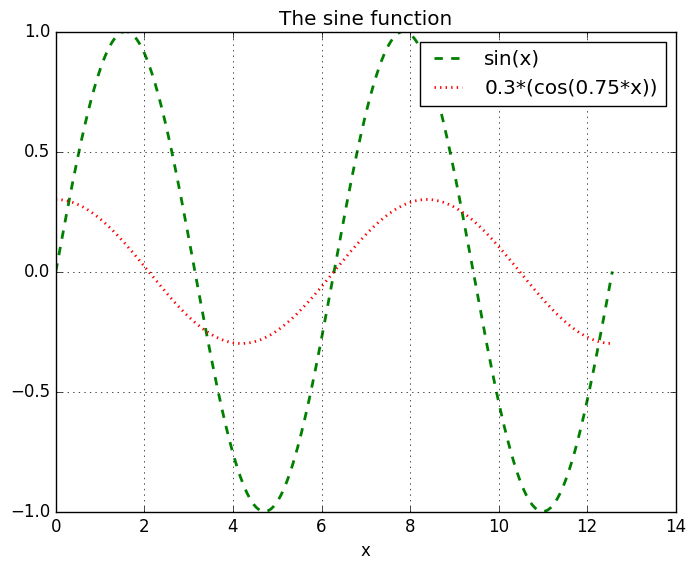

PyObject <matplotlib.legend.Legend object at 0x315153890>

In [2]:
using PyPlot

x = linspace(0,4*pi,1000); # vector of 1000 uniformly spaced points in [0, 4*pi]
y = sin(x); # apply sin() to all values in x, creating another 1000-dimensional vector
plot(x, y, color="green", linewidth=2.0, linestyle="--", label="sin(x)") # plot y against x

z = 0.3*cos(0.75*x) # another function of x
plot(x, z, color="red", linewidth=2.0, linestyle=":", label="0.3*(cos(0.75*x))") # plot on the same diagram


title("The sine function")
xlabel("x")
grid("on")
legend(loc="upper right")

## 6. Example: Gradient descent algorithm in 2D

For $x, b \in \mathbb{R}^2$, $c \in \mathbb{R}$ and a positive definite symmetric matrix $A \in \mathbb{R}^{2\times 2}$, define
$$f(x) = x^T A x + b^T x + c$$

**Goal:** find $x^* = \text{arg min}_{x \in \mathbb{R}^2}{f(x)}$, i.e. the value of $x$ which minimizes $f(x)$.

Taking derivative and setting to zero, we get:

$$\nabla f(x) = 2 A x + b = 0 \implies x^* = \frac{1}{2} (A)^{-1} b$$

However, in higher dimensions, computing the inverse of $A$ is usually very expensive and we want to avoid it. Instead, we will try to find the minimizer using a **gradient descent algorithm**:

- initialize $x^{(0)}$
- set $x^{(t+1)} \leftarrow x^{(t)} - \lambda \nabla f(x^{(t)})$, where $\lambda \in \mathbb{R}^+$ is a step size parameter.

For $\lambda$ sufficiently small, this procedure converges towards the true value $x^*$.

### Setup

Since this is a small illustrative example, it is actually quite easy to calculate the actual value of $x^*$. Thanks to this we will be able to track how does the distance $||x^{(t)} - x^*||^2$ change with $t$.

In [ ]:
srand(2)

m = 2
n = 2

A = randn(m,n); # a random matrix A is most likely non-singular (can check that it is)
A = A' * A; # make A symmetric and positive definite
b = randn(n)
c = randn();
println("A = ", A)
println("b = ", b)
println("c = ", c)

x_star = - 0.5 * (A \ b) # this finds the solution by solving the linear system directly
println("x* = ", x_star)

function f(x) 
    return (x' * A * x + b' * x + c)[1] # we want this to be a scalar, not 1-dim vector
end

function grad_f(x)
    return (2 * A * x + b)
end

f_star = f(x_star) # this is the optimal value for f
println("f(x*) = ", f_star)

Now we just need to iterate, and save the values to be plotted later:

In [ ]:
x = zeros(n) # start at x = [0, 0]
T = 100 # number of iterations
lambda = 0.05 # step size

xs = zeros(T, 2)

for t=1:T
    x = x - lambda * grad_f(x) # GD update
    xs[t,:] = x'
end

In [ ]:
using PyPlot

scatter(xs[:,1], xs[:,2], color="red", s=15., label=string("iterates ", L"x^{(t)}"))
annotate("x*", xy=x_star+0.005, color="green")
for t=1:10
    annotate(string("x_", t-1), xy=xs[t,:]+0.005, color="red")
end

scatter(x_star[1], x_star[2], s=50., color="green", label=L"x^*")
xlabel(L"x_1") # L"..." means LaTeX
ylabel(L"x_2")
title("Convergence of the iterates to the minimizer")
legend(loc="upper right")

grid("on")


## <font color="blue">7. Solved Exercises</font><br>

<font color="blue"> You can find sample solutions for the exercises below. Make sure you understand how and why these work. However, bear in mind that these are not the only correct solutions, so don't worry if you did them in a different way! </font>

### Q1:

Write a function to draw $n$ samples from the Bernoulli distribution (i.e. it should return $1$ with probability $p$, and $0$ with probability $(1-p)$).

In [ ]:
function Bernoulli(n, p)
    out = zeros(n);
    out[rand(n) .< p] = 1;
    return out;
end

In [ ]:
# Test it here
println(Bernoulli(20, 0.3)) 

samples = 10000
sum(Bernoulli(samples, 0.3))/samples # should be close to 0.3

### Q2:

Write a function to draw $n$ samples from the normal distribution with mean $m$ and standard deviation $s$.

In [ ]:
function Gauss(n, m, s)
    return randn(n)*s + m
end

In [ ]:
# Test it here
Gauss(20, 5, 0.1)

### Q3:

In the examples above you have seen how to form a $m \times n$ matrix filled with the numbers $\{1, 2, \ldots, mn\}$ column by column. Can you do it so that the numbers will be in the matrix sorted row by row instead?

In [ ]:
m = 3
n = 5
M = reshape(1:m*n, n, m) # first create the column-wise n*m matrix
M = M' # transpose to get row-wise m*n matrix

### Q4:

For the GD problem above, plot a diagram showing how $f(x^{(t)})$ changes with $t$.

In [ ]:
# Run the cells of section 6 before this

# Calculate the functional values to plot
fs = zeros(T)
for t=1:T
    fs[t] = f(xs[t,:])
end

In [ ]:
# Plot it on the same diagram as f(x^*)

plot(1:T, fs, color="red", label=L"f(x^{(t)})")
plot(1:T, ones(T) * f_star, color="green", label=L"f(x^*)")

xlabel(L"t") # L"..." means LaTeX
title("Convergence of the functional value")
legend(loc="upper right")

grid("on")

*Follow-up:*

Ok, we plotted something... but it is not the most useful diagram you have ever seen, or is it? For $t$ close to $40$, the functional value of our iterates is already so close to the minimum that we can't see the difference.

Instead, we might want to plot the **difference** $f(x^{(t)})-f(x^*)$ on a graph with **log scale** on the y-axis. As we expect this value to go to 0, plotting its logarithm might be more informative (i.e. it might tell  us more about how fast it converges etc).

In [ ]:
semilogy(1:T, fs-f_star, color="blue") # plot on graph with logarithmic y-axis (see also semilogx and loglog)

xlabel(L"t")
ylabel(L"f(x^{(t)})-f(x^*)")
title("Convergence of the functional value")
grid("on")

This looks really linear! In other words, it seems like

$$\log{\left(f\left(x^{(t)}\right) - f\left(x^*\right)\right)} = \alpha t + \beta$$

for some constants $\alpha$ and $\beta$ (we could find these by fitting a linear line to our data). This is equivalent to saying that

$$f\left(x^{(t)}\right) - f\left(x^*\right) = \gamma . e^{\alpha t}$$

for $\gamma = e^\beta$, i.e. the distance between $f\left(x^{(t)}\right)$ and $f\left(x^*\right)$ **decreases exponentially**.